## The third Lab-assignment (07/22/2022 11:59'AM' - 07/26/2022 11:59PM, 50 points in total)

The purpose of this exercise is to understand users' information needs, then collect data from different sources for analysis.

Question 1 (10 points). Fomulate your domain problem: Describe an interesting research question (or practical question) you have in mind, what kind of data should be collected to answer the question(s)? How many data needed for the analysis? The detail steps for collecting and save the data. 

In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:

I would like to work on Stress detection in our day to day life.Humans are vulnerable to mental health problems due to stress, anxiety, and sadness. There is a reason why everyone leads a difficult lifestyle. People commonly express their feelings on social media platforms like Instagram, where they do so through photographs and stories,
and Reddit, where they do so by asking for advice about their life in subreddits.Stress identification is a difficult endeavor since there are so many terms that individuals can use in their postings to indicate whether they are experiencing mental stress or not.The data can be of any type from photograph to a comment or a status.To begin with we need
a data of 100 people,which can either be a status or a reel or a comment made by them in the recent time.These can be extarced from there profile manually and stored in an excel.We classify the data collected into postive and negative words/emotions,Adverbs of degree and related emotion words,based on shared image color(warm/clear etc.,)
or  the data can be taken from a second hand datasets like Kaggle,dathub.io,Earthdata etc.,



'''

Question 2 (30 points). Collect your data to answer the research problem: Write python code to collect 1000 data samples you discussed above.

In [10]:
!pip3 install wordcloud


          subreddit post_id sentence_range  \
0              ptsd  8601tu       (15, 20)   
1        assistance  8lbrx9         (0, 5)   
2              ptsd  9ch1zh       (15, 20)   
3     relationships  7rorpp        [5, 10]   
4  survivorsofabuse  9p2gbc         [0, 5]   

                                                text     id  label  \
0  He said he had not felt that way before, sugge...  33181      1   
1  Hey there r/assistance, Not sure if this is th...   2606      0   
2  My mom then hit me with the newspaper and it s...  38816      1   
3  until i met my new boyfriend, he is amazing, h...    239      1   
4  October is Domestic Violence Awareness Month a...   1421      1   

   confidence  social_timestamp  social_karma  syntax_ari  ...  \
0         0.8        1521614353             5    1.806818  ...   
1         1.0        1527009817             4    9.429737  ...   
2         0.8        1535935605             2    7.769821  ...   
3         0.6        1516429555       

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


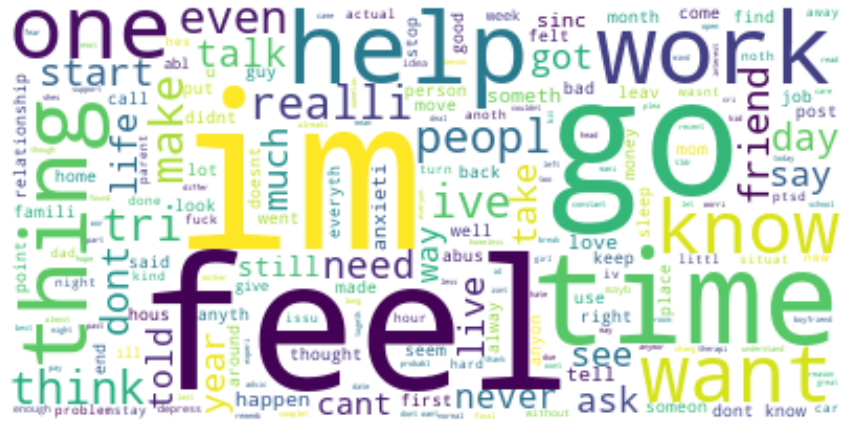

In [11]:
# You code here (Please add comments in the code):
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
raw_data = pd.read_csv("https://raw.githubusercontent.com/Navya-Dr/Navya_INFO-5502_Summer_2022/main/S.csv")
print(raw_data.head())
print(raw_data.isnull().sum()) # dataset contains any null values or not


# preparing the textual section of this dataset to remove stopwords
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)


# most common phrases people use when talking about their lives
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



Question 3 (10 points). Understand the data quality: Search a second hand dataset (any dataset) from kaggle or other websites. Describe the data quality problem of the dataset and explain your strategy to clean the data.

In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):
'''

Please write you answer here:

The data we get from kaggle/datahub.io consists of null values and some new type of words apart from stop words we have used as part of 
data collection.First we check the data has any null values and then we remove the stop words from the comments or text we  have 
collected .If this data has image in it we have to chcek if the image is of low quality or a faded image,if its of low qulaity we have use image processing to extract the clear info.The data collected can be in 
any lanaguage so need to convert it to one language to simply the classification.Some data may be irreleant to the scenario we have to 
ignore those data and take into account only the relevant data.Excessive blank space between text should be eliminated.If the text is in formatted 
heavily we have to take it out.We have to check for spell issues using SymSpell/pyspellchecker.



'''